In [147]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [148]:
#loading the dataset
df = pd.read_csv('titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.00,1.00,"Allen, Miss. Elisabeth Walton",female,29.00,0.00,0.00,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1.00,1.00,"Allison, Master. Hudson Trevor",male,0.92,1.00,2.00,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.00,0.00,"Allison, Miss. Helen Loraine",female,2.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.00,0.00,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON"
4,1.00,0.00,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.00,2.00,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [149]:
# exploring missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [150]:
# dropping missing values in class column
df.dropna(subset=['pclass'],inplace=True)

In [151]:
#filling missing age 
df.groupby('pclass').agg({'age':'mean'})

,age
pclass,
1.00,39.16
2.00,29.51
3.00,24.82


In [152]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
df['age'] = df[['age', 'pclass']].apply(impute, axis=1)

In [153]:
#drop columns with many nan
df.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [154]:
# drop missing values 
df.dropna(inplace=True)

In [155]:
# final data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   float64
 6   parch     1306 non-null   float64
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.2+ KB


<AxesSubplot:xlabel='survived', ylabel='count'>

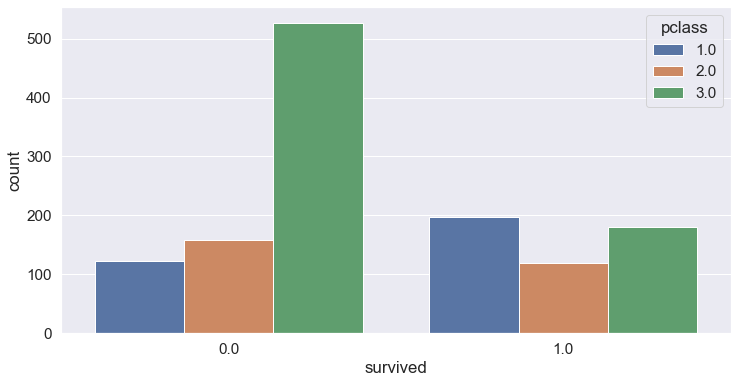

In [156]:
# The class has great impact on the survival rate
plt.figure(figsize=(12,6))
sns.countplot(x = 'survived', hue = 'pclass', data = df)

In [157]:
# checking the perecenatage survived in each class
pclass_count = df[['pclass','name']].groupby('pclass').count().reset_index()
pclass_sum = df[['pclass','survived']].groupby('pclass').sum().reset_index()
pc = pclass_count.merge(pclass_sum,on='pclass')
pc['percentage'] = round(pc['survived']/pc['name']*100,0)
pc

,pclass,name,survived,percentage
0,1.00,321,198.00,62.00
1,2.00,277,119.00,43.00
2,3.00,708,181.00,26.00


<AxesSubplot:xlabel='pclass', ylabel='percentage'>

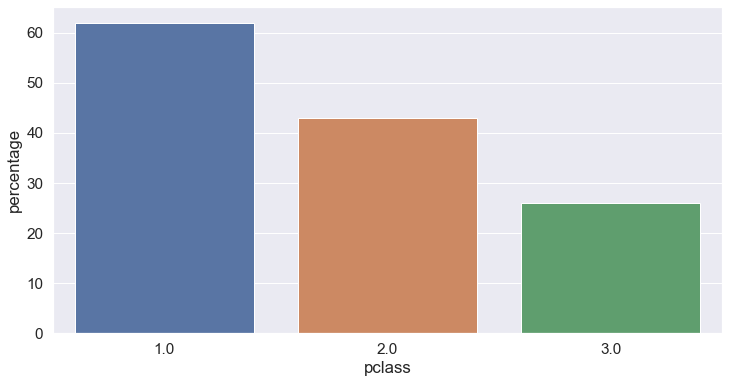

In [158]:
# a bigger percentage of the higher class has been survived which indecate a great effect on the survival rate
plt.figure(figsize=(12,6))
sns.barplot(x = 'pclass',y = 'percentage',  data = pc)

In [159]:
bins = [5, 10, 20 , 30, 40, 50, 60, 70, 80]
df2 = (df[['age','survived']]
 .groupby(pd.cut(df['age'], [0]+bins,
                 labels=bins,
                 right=True)) 
 ['survived'].sum()
 .reset_index()
)
df2['percentage'] = round(df2.survived /sum(df2.survived)*100,0)
df2

,age,survived,percentage
0,5,37.00,7.00
1,10,13.00,3.00
2,20,64.00,13.00
3,30,188.00,38.00
4,40,107.00,21.00
5,50,52.00,10.00
6,60,30.00,6.00
7,70,5.00,1.00
8,80,2.00,0.00


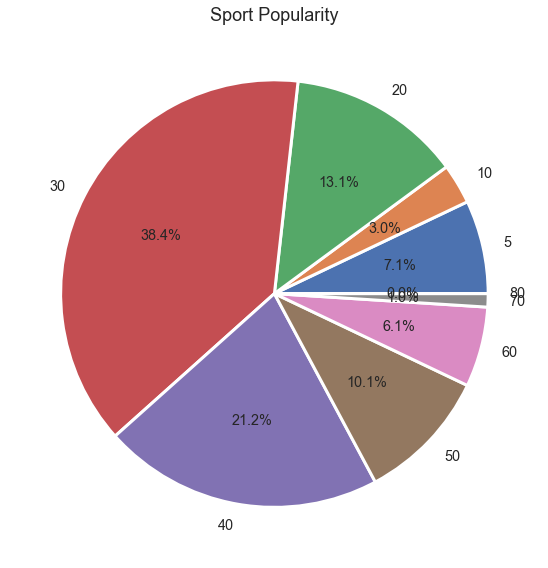

In [160]:
# the age from 20 to 30 have the highest percentage among the survivals 
fig, ax = plt.subplots(figsize=(8, 8))


ax.pie(df2['percentage'], labels=df2['age'], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('Sport Popularity', fontsize=18)
plt.tight_layout()

In [161]:
#exploring the impact of the sex on the survival rate
df3 = df[['sex','survived']].groupby('sex').agg({'survived':['sum','count']}).reset_index()
df3['percentage']=round(df3.iloc[:,1]/df3.iloc[:,2]*100,0)
df3.columns = ['sex','sum_surv','count_surv','percentage']
df3

,sex,sum_surv,count_surv,percentage
0,female,337.00,464,73.00
1,male,161.00,842,19.00


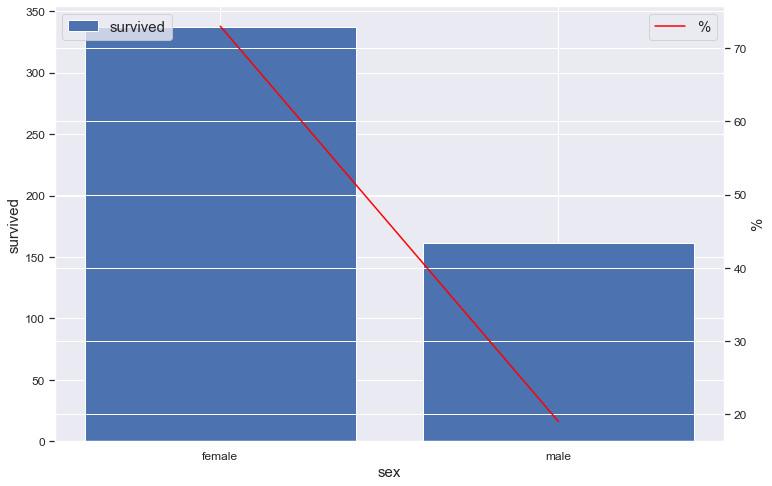

In [162]:
#showing the sex has a great impact as well on the survival rate
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = df3.sex, height= df3.sum_surv, label = "survived")
ax2 = ax1.twinx()
ax2.plot(df3.sex, df3.percentage, color = "red", label = "%")
ax1.set_xlabel("sex", fontsize = 15)
ax1.set_ylabel("survived", fontsize = 15)
ax2.set_ylabel("%", fontsize = 15)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [163]:
#exploring embarked feature
df4 = df[['embarked','survived']].groupby('embarked').agg({'survived':['sum','count']}).reset_index()
df4['percentage']=round(df4.iloc[:,1]/df4.iloc[:,2]*100,0)
df4.columns = ['embarked','sum_surv','count_surv','percentage']
df4

,embarked,sum_surv,count_surv,percentage
0,C,150.00,270,56.00
1,Q,44.00,123,36.00
2,S,304.00,913,33.00


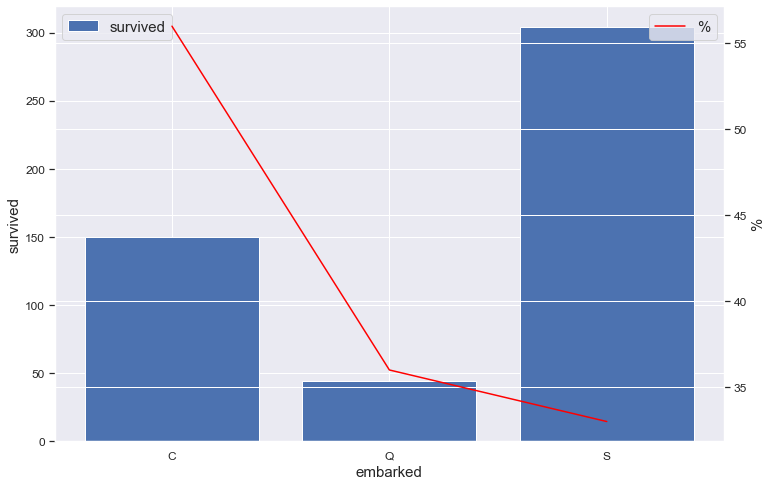

In [164]:
#showing the emraked has a less impact on the survival rate. However, it still has a bit of correlation with survival rate
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = df4.embarked, height= df4.sum_surv, label = "survived")
ax2 = ax1.twinx()
ax2.plot(df4.embarked, df4.percentage, color = "red", label = "%")
ax1.set_xlabel("embarked", fontsize = 15)
ax1.set_ylabel("survived", fontsize = 15)
ax2.set_ylabel("%", fontsize = 15)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [165]:
#exploring the fare column
bins = [10, 100 , 200, 300, 600]
df5 = (df[['fare','survived']]
 .groupby(pd.cut(df['fare'], [0]+bins,
                 labels=bins,
                 right=True)) 
.agg({'survived':['sum','count']})
 .reset_index()
)
df5['percentage']=round(df5.iloc[:,1]/df5.iloc[:,2]*100,0)
df5.columns = ['fare','sum_surv','count_surv','percentage']
df5

,fare,sum_surv,count_surv,percentage
0,10,108.00,474,23.00
1,100,328.00,731,45.00
2,200,34.00,46,74.00
3,300,22.00,34,65.00
4,600,4.00,4,100.00


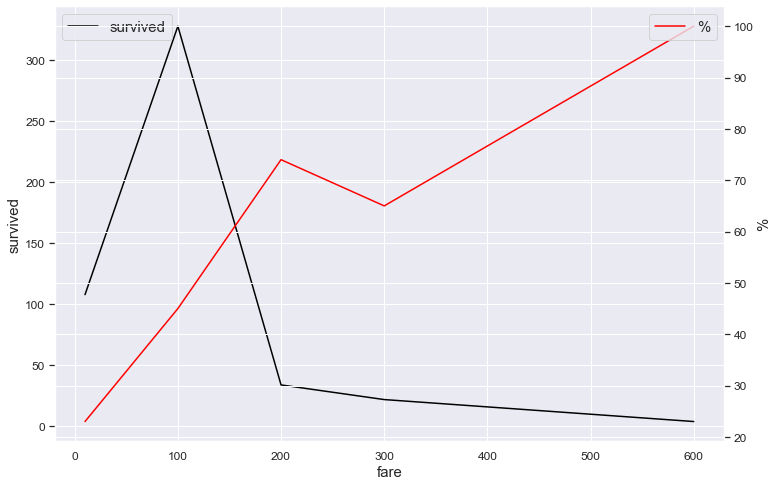

In [166]:
# showing the relationship between the fare and the survival rate 
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.plot(df5.fare,  df5.sum_surv, label = "survived",color='black')
ax2 = ax1.twinx()
ax2.plot(df5.fare, df5.percentage, color = "red", label = "%")
ax1.set_xlabel("fare", fontsize = 15)
ax1.set_ylabel("survived", fontsize = 15)
ax2.set_ylabel("%", fontsize = 15)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)

In [167]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.00,1.00,"Allen, Miss. Elisabeth Walton",female,29.00,0.00,0.00,24160,211.34,S
1,1.00,1.00,"Allison, Master. Hudson Trevor",male,0.92,1.00,2.00,113781,151.55,S
2,1.00,0.00,"Allison, Miss. Helen Loraine",female,2.00,1.00,2.00,113781,151.55,S
3,1.00,0.00,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.00,2.00,113781,151.55,S
4,1.00,0.00,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.00,2.00,113781,151.55,S


In [168]:
# removing the unused column in the model
df.drop(['name','ticket'],axis=1,inplace=True)

In [169]:
# transfering the catgorical columns to dummies
embarked_d = pd.get_dummies(df['embarked'], drop_first=True)
pclass_d = pd.get_dummies(df['pclass'], drop_first=True)
sex_d = pd.get_dummies(df['sex'], drop_first=True)
sibsp_d = pd.get_dummies(df['sibsp'], drop_first=True)
parch_d = pd.get_dummies(df['parch'], drop_first=True)

In [170]:
df = pd.concat([df.drop(['pclass', 'sex','sibsp', 'parch', 'embarked'],axis=1),embarked_d,pclass_d,sex_d,sibsp_d,parch_d],axis =1)
df

,survived,age,fare,Q,S,2.0,3.0,male,1.0,2.0,...,4.0,5.0,8.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0
0,1.00,29.00,211.34,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.00,0.92,151.55,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.00,2.00,151.55,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.00,30.00,151.55,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.00,25.00,151.55,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.00,14.50,14.45,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1305,0.00,25.00,14.45,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1306,0.00,26.50,7.22,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0.00,27.00,7.22,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df.isna().any()

survived    False
age         False
fare        False
Q           False
S           False
2.0         False
3.0         False
male        False
1.0         False
2.0         False
3.0         False
4.0         False
5.0         False
8.0         False
1.0         False
2.0         False
3.0         False
4.0         False
5.0         False
6.0         False
9.0         False
dtype: bool

In [173]:
# scalling the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(df[['age','fare']])     
scaled_features = scaler.transform(df[['age','fare']])
df_feat = pd.DataFrame(scaled_features, columns = df[['age','fare']].columns)    
df_feat

,age,fare
0,-0.02,3.44
1,-2.17,2.29
2,-2.09,2.29
3,0.05,2.29
4,-0.33,2.29
...,...,...
1301,-1.13,-0.36
1302,-0.33,-0.36
1303,-0.22,-0.50
1304,-0.18,-0.50


In [182]:
df =pd.merge(df.drop(['age','fare'],axis=1), df_feat, left_index=True, right_index=True)

In [183]:
df

,survived,Q,S,2.0,3.0,male,1.0,2.0,3.0,4.0,...,8.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,age,fare
0,1.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.02,3.44
1,1.00,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,-2.17,2.29
2,0.00,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,-2.09,2.29
3,0.00,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0.05,2.29
4,0.00,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,-0.33,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0.00,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.13,-0.36
1302,0.00,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.33,-0.36
1303,0.00,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.22,-0.50
1304,0.00,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.18,-0.50


In [190]:
# Import  libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [185]:
# assigning X and y features
X = df.drop('survived', axis=1)
y = df['survived']

In [188]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.6)

In [194]:
from time import time
import visuals as vs
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #  Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [197]:
TP = np.sum(y) 
FP = y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = (TP)/(TP+FN)
precision = (TP)/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * ((precision * recall) / ((0.5**2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3822, F-score: 0.4361]


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


BaggingClassifier trained on 5 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


BaggingClassifier trained on 52 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


BaggingClassifier trained on 521 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier trained on 5 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier trained on 52 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier trained on 521 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier trained on 5 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier trained on 52 samples.


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier trained on 521 samples.


C:\Users\mina.aziz\Downloads\Machine Learning\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


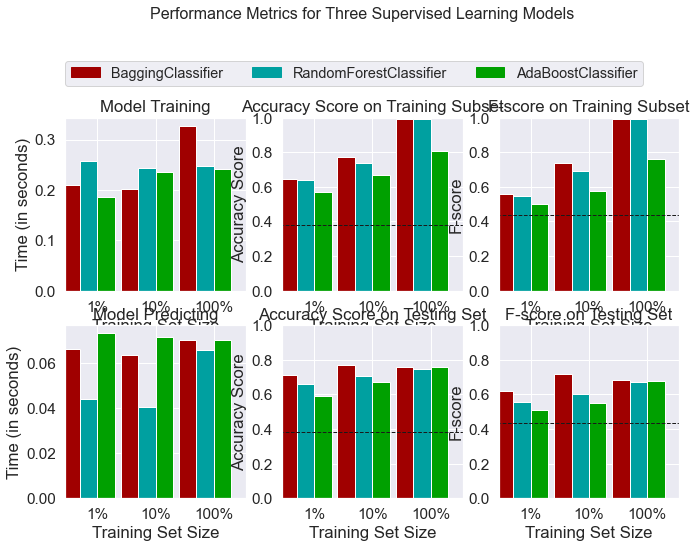

In [198]:
# Initialize the  models
clf_A = BaggingClassifier(n_estimators=200,random_state=1)
clf_B = RandomForestClassifier(n_estimators=200,random_state=1)
clf_C = AdaBoostClassifier(n_estimators=200,random_state=1)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


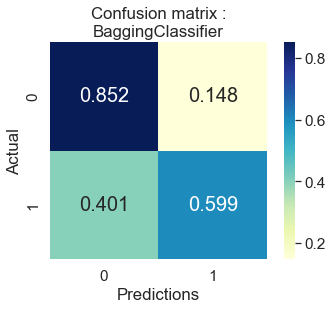

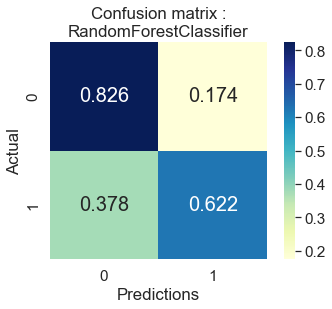

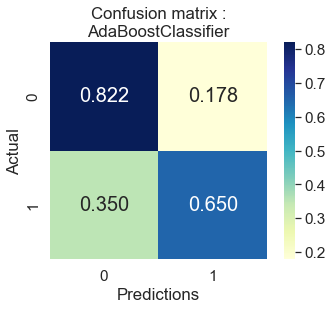

In [199]:
# randomforest shown to be the best model considering the time and results
from sklearn.metrics import confusion_matrix
for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":20}, 
            cmap='YlGnBu', square=True, fmt='.3f')
    plt.ylabel('Actual')
    plt.xlabel('Predictions')
    plt.title('Confusion matrix :\n{}'.format(model.__class__.__name__));

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=1)


parameters =  { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


#  fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=10)

# grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Unoptimized model
------
Accuracy score on testing data: 0.7519
F-score on testing data: 0.6732

Optimized Model
------
Final accuracy score on the testing data: 0.7890
Final F-score on the testing data: 0.7420


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


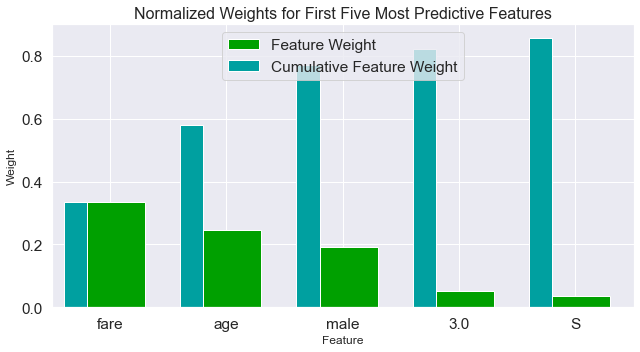

In [201]:
#checking features importance
importances = clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [202]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


Final Model trained on full data
------
Accuracy on testing data: 0.7890
F-score on testing data: 0.7420

Final Model trained on reduced data
------
Accuracy on testing data: 0.7877
F-score on testing data: 0.7358


C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
